## Load the data

            predicted rate
week                      
2011-08-08       22.037713
2011-08-15       20.488263
2011-08-22       16.470936
2011-08-29       15.447659
2011-09-05       12.811630
            hayfever rate
week                     
2011-08-08          10.18
2011-08-15          11.10
2011-08-22          10.15
2011-08-29           7.17
2011-09-05           7.40


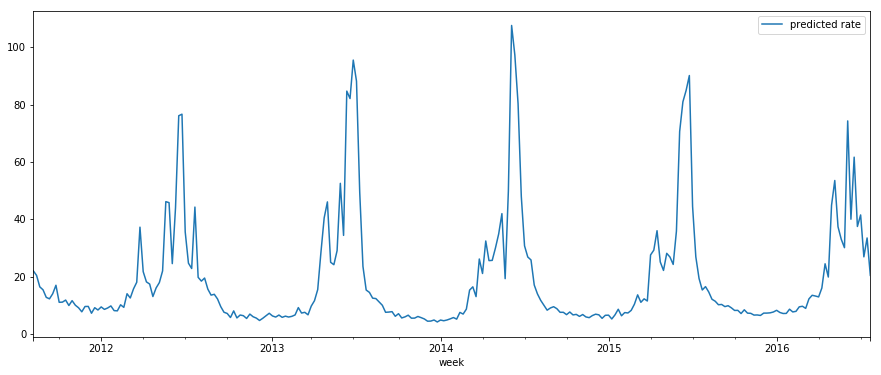

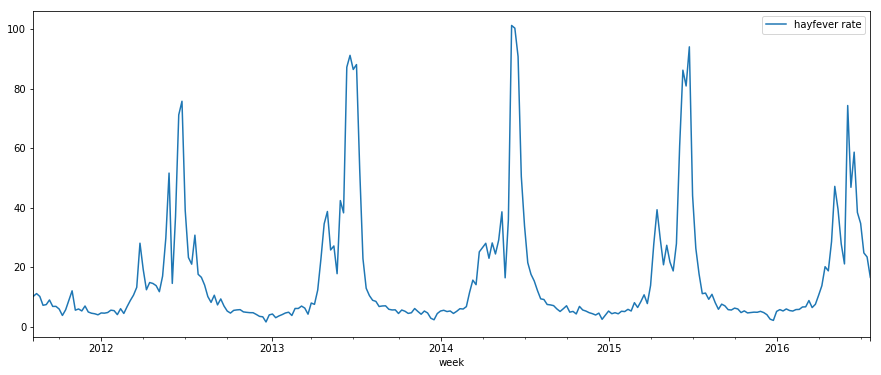

In [1]:
from pandas import read_csv
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from matplotlib.pylab import rcParams
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.mlab as mlab

rcParams['figure.figsize'] = 15, 6

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
elastic = read_csv('/Users/Helen/Documents/Data/codes/pre.csv', parse_dates=['week'],
                   index_col=['week'],date_parser=dateparse) # Load the data of hayfever estimating results from Elastic net
true = read_csv('/Users/Helen/Documents/Data/codes/true.csv', parse_dates=['week'],
                   index_col=['week'],date_parser=dateparse) # Actual RCGP data

print(elastic.head())
print(true.head())
elastic.plot()
true.plot()
pyplot.show()

## Distribute the data size

In [2]:

# create 4 ARIMAX models by combining estimating results from Elastic net
# 52-week

train1, test1 = elastic[52:104], true[52:104] # test period 1


train2, test2 = elastic[104:156], true[104:156] # test period 2


train3, test3= elastic[156:208], true[156:208] # test period 3

train4, test4 = elastic[208:261], true[208:261]# test period 4
          

L1=test1.index
L2=test2.index
L3=test3.index
L4=test4.index

In [3]:
test1_=test1.values
test2_=test2.values
test3_=test3.values
test4_=test4.values

## ARIMAX1

In [4]:
import statsmodels.api as sm
mod = sm.tsa.SARIMAX(endog = test1_,exog = train1, order=(5,1,1))
fit_res = mod.fit(disp=0)
print(fit_res.summary())
predictions1=fit_res.predict()

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(5, 1, 1)   Log Likelihood                -131.642
Date:                Wed, 06 Sep 2017   AIC                            279.284
Time:                        22:37:29   BIC                            294.894
Sample:                    08-06-2012   HQIC                           285.269
                         - 07-29-2013                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
predicted rate     1.0400      0.030     34.788      0.000       0.981       1.099
ar.L1             -0.6273      1.389     -0.451      0.652      -3.350       2.096
ar.L2             -0.6015      1.186

##  RMSE, MAE, and Pearson corrleation

In [5]:
df1 = pd.DataFrame(predictions1,index=L1,columns=['predictive_rate'])
df1_true = pd.DataFrame(test1_, index=L1,columns=["real hayfever rate"])

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_absolute_error
from scipy.stats.stats import pearsonr 


MSE1 = mean_squared_error(test1_, predictions1, sample_weight=None, multioutput='uniform_average')
rmse_c1=np.sqrt(MSE1)
print("%.4f" % rmse_c1)
mae_c1 = mean_absolute_error(test1, predictions1, sample_weight=None, multioutput='uniform_average')
print("%.4f" % mae_c1)
r_c=pearsonr(list(test1['hayfever rate']), list(predictions1))
print(r_c)

3.1391
2.2048
(0.99091651427956995, 3.0671332599152045e-45)


# ARIMAX2

In [6]:

mod = sm.tsa.SARIMAX(endog = test2_,exog = train2, order=(4,1,1))
fit_res = mod.fit(disp=0)
print(fit_res.summary())
predictions2=fit_res.predict()

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(4, 1, 1)   Log Likelihood                -132.922
Date:                Wed, 06 Sep 2017   AIC                            279.844
Time:                        22:37:29   BIC                            293.503
Sample:                    08-05-2013   HQIC                           285.081
                         - 07-28-2014                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
predicted rate     0.9824      0.021     46.669      0.000       0.941       1.024
ar.L1              0.3950      0.194      2.037      0.042       0.015       0.775
ar.L2             -0.2026      0.151

## RMSE, MAE, and Pearson corrleation

In [7]:
df2 = pd.DataFrame(predictions2,index=L2,columns=['predictive_rate'])
df2_true = pd.DataFrame(test2_, index=L2,columns=["real hayfever rate"])

MSE2 = mean_squared_error(test2_, predictions2, sample_weight=None, multioutput='uniform_average')
rmse_c2=np.sqrt(MSE2)
print("%.4f" % rmse_c2)
mae_c2 = mean_absolute_error(test2, predictions2, sample_weight=None, multioutput='uniform_average')
print("%.4f" % mae_c2)
r_c2=pearsonr(list(test2['hayfever rate']), list(predictions2))
print(r_c2)

3.2085
2.1654
(0.99009382721554906, 2.6541524029992486e-44)


# ARIMAX3

In [8]:
mod = sm.tsa.SARIMAX(endog = test3_,exog = train3, order=(6,1,1))
fit_res = mod.fit(disp=0)
print(fit_res.summary())
predictions3=fit_res.predict()

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(6, 1, 1)   Log Likelihood                -126.409
Date:                Wed, 06 Sep 2017   AIC                            270.818
Time:                        22:37:30   BIC                            288.379
Sample:                    08-04-2014   HQIC                           277.550
                         - 07-27-2015                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
predicted rate     1.0037      0.020     51.053      0.000       0.965       1.042
ar.L1             -0.0234      0.154     -0.152      0.879      -0.325       0.278
ar.L2             -0.0597      0.156

## RMSE, MAE, and Pearson corrleation

In [9]:
df3 = pd.DataFrame(predictions3,index=L3,columns=['predictive_rate'])
df3_true = pd.DataFrame(test3_, index=L3,columns=["real hayfever rate"])


MSE3 = mean_squared_error(test3_, predictions3, sample_weight=None, multioutput='uniform_average')
rmse_c3=np.sqrt(MSE3)
print("%.4f" % rmse_c3)
mae_c3 = mean_absolute_error(test3, predictions3, sample_weight=None, multioutput='uniform_average')
print("%.4f" % mae_c3)
r_c3=pearsonr(list(test3['hayfever rate']), list(predictions3))
print(r_c3)

2.7773
1.8187
(0.99131153181573073, 1.0138816139511248e-45)


# ARIMAX4

In [10]:
mod = sm.tsa.SARIMAX(endog = test4_,exog = train4, order=(6,1,1))
fit_res = mod.fit(disp=0)
print(fit_res.summary())
predictions4=fit_res.predict()

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(6, 1, 1)   Log Likelihood                -129.768
Date:                Wed, 06 Sep 2017   AIC                            277.537
Time:                        22:37:30   BIC                            295.098
Sample:                    08-03-2015   HQIC                           284.269
                         - 07-25-2016                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
predicted rate     0.9753      0.076     12.785      0.000       0.826       1.125
ar.L1              0.0850      0.346      0.246      0.806      -0.594       0.764
ar.L2             -0.1363      0.283

## RMSE, MAE, and Pearson corrleation

In [11]:
df4 = pd.DataFrame(predictions4,index=L4,columns=['predictive_rate'])
df4_true = pd.DataFrame(test4_, index=L4,columns=["real hayfever rate"])

MSE4 = mean_squared_error(test4_, predictions4, sample_weight=None, multioutput='uniform_average')
rmse_c4=np.sqrt(MSE4)
print("%.4f" % rmse_c4)
mae_c4 = mean_absolute_error(test4, predictions4, sample_weight=None, multioutput='uniform_average')
print("%.4f" % mae_c4)
r_c4=pearsonr(list(test4['hayfever rate']), list(predictions4))
print(r_c4)

3.0480
1.8921
(0.98059559212123204, 4.7409532593265763e-37)


l1=list(test['hayfever rate'])
l2=list(predictions)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean((np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true)) * 100))
mape_c = mean_absolute_percentage_error(l1, l2)
print("%.8f" % mape_c)

# Graphical Comparison with Elastic net

In [12]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data=pd.read_csv('/Users/Helen/Documents/Data/query1/features.csv',parse_dates=['week'],index_col=0,date_parser=dateparse)

In [13]:

train_1, valid_1 = data[0:448], data[448:500] #2
train_2, valid_2 = data[0:500], data[500:552] #3
train_3, valid_3 = data[0:552], data[552:604]#4
train_4, valid_4 = data[0:604], data[604:657] #5

In [14]:
L_1=valid_1.index
L_2=valid_2.index
L_3=valid_3.index
L_4=valid_4.index


In [15]:
features=['hayfever','hay fever','symptoms of hayfever','hayfever remedies','hayfever injection','hayfever cure', 'hayfever treatment',
          'hayfever uk','hayfever relief','hay fever symptoms',
          'hayfever symptoms','hayfever tablets',
          'pollen','hayfever eyes','hayfever eye', 'pollen count','hayfever spray',
          'hayfever count','hayfever medicine',
          'hayfever boots','what is hayfever',
          'hayfever medication','pregnant hayfever','hayfever pregnancy','hayfever in pregnancy',
          'hayfever cures','cures for hayfever',
          'hayfever eye drops','best hayfever tablets','hayfever children',
          'cure hayfever', 'hayfever remedy',
           'itchy eyes','sneezing','red eyes','blocked sinuses','runny nose','shortness of breath',
            'hayfever pollen count',
           'boots hayfever','honey hayfever','bbc pollen count','uk pollen count',
            'remedies for hayfever']
queries=features[0:]
len(set(queries))

44

In [16]:
from scipy.stats.stats import pearsonr  
selected=[]
for x in features:
    r=pearsonr(data[x], data['hayfever_rate'])
    if(r[0])>=(0.65):
        selected.append(x)
len(set(selected))

38

In [17]:
y_train1 = train_1['hayfever_rate'].values
x_train1 = train_1[selected]
x_valid1 = valid_1[selected]
y_valid1 = valid_1['hayfever_rate'].values
y_train2 = train_2['hayfever_rate'].values
x_train2 = train_2[selected]
x_valid2 = valid_2[selected]
y_valid2 = valid_2['hayfever_rate'].values
y_train3 = train_3['hayfever_rate'].values
x_train3 = train_3[selected]
x_valid3 = valid_3[selected]
y_valid3 = valid_3['hayfever_rate'].values
y_train4 = train_4['hayfever_rate'].values
x_train4 = train_4[selected]
x_valid4 = valid_4[selected]
y_valid4 = valid_4['hayfever_rate'].values

In [18]:
from sklearn.linear_model import ElasticNet
enet1 = ElasticNet(alpha=124.78, l1_ratio=0.5,fit_intercept=True, max_iter=20000, tol=0.0000001) 
enet2 = ElasticNet(alpha=87.74, l1_ratio=0.5,fit_intercept=True, max_iter=20000, tol=0.0000001) 
enet3 = ElasticNet(alpha=154.01, l1_ratio=0.5,fit_intercept=True, max_iter=20000, tol=0.0000001) 
enet4 = ElasticNet(alpha=220.28, l1_ratio=0.5,fit_intercept=True, max_iter=20000, tol=0.0000001) 
enet1 = enet1.fit(x_train1, y_train1)
y_pred_enet1 = enet1.predict(x_valid1)
enet2 = enet2.fit(x_train2, y_train2)
y_pred_enet2 = enet2.predict(x_valid2)
enet3 = enet3.fit(x_train3, y_train3)
y_pred_enet3 = enet3.predict(x_valid3)
enet4 = enet4.fit(x_train4, y_train4)
y_pred_enet4 = enet4.predict(x_valid4)
#enet.intercept_

# ARIMAX1 VS elastic net1

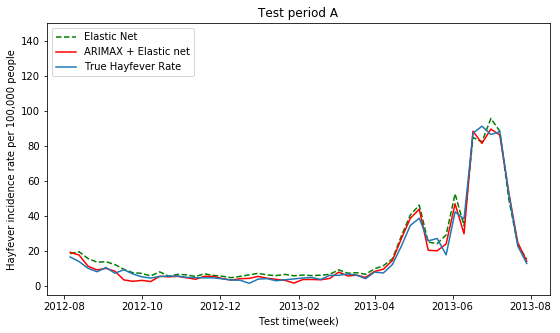

In [19]:
df_1 = pd.DataFrame(data=y_pred_enet1, index=L1,columns=["predicted rate"])
plt.figure(figsize=(9,5))
plt.ylim((-5, 150))
plt.ylabel("Hayfever incidence rate per 100,000 people")
plt.xlabel("Test time(week)")
plt.plot(df_1, label='Elastic Net',color='g',linestyle='--')
plt.plot(df1, label='ARIMAX with Elastic net',color='r')
plt.plot(df1_true, label='True Hayfever Rate')
plt.title('Test period A')
#plt.suptitle('RMSE of ARIMAX + Elastic net: %.4f'% rmse_c )
plt.legend(['Elastic Net', 'ARIMAX + Elastic net', 'True Hayfever Rate','ARIMA'], loc='upper left')
pyplot.show()

# ARIMAX2 VS elastic net2

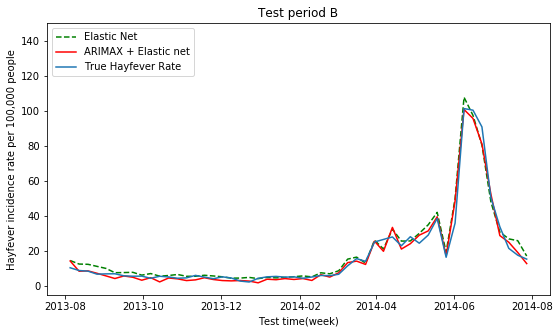

In [20]:
df_2 = pd.DataFrame(data=y_pred_enet2, index=L2,columns=["predicted rate"])
plt.figure(figsize=(9,5))
plt.ylim((-5, 150))
plt.ylabel("Hayfever incidence rate per 100,000 people")
plt.xlabel("Test time(week)")
plt.plot(df_2, label='Elastic Net',color='g',linestyle='--')
plt.plot(df2, label='ARIMAX with Elastic net',color='r')
plt.plot(df2_true, label='True Hayfever Rate')
plt.title('Test period B')
#plt.suptitle('RMSE of ARIMAX + Elastic net: %.4f'% rmse_c )
plt.legend(['Elastic Net', 'ARIMAX + Elastic net', 'True Hayfever Rate','ARIMA'], loc='upper left')
pyplot.show()

# ARIMAX3 VS elastic net3

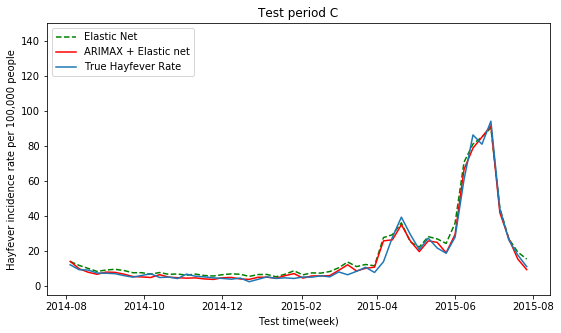

In [21]:
df_3 = pd.DataFrame(data=y_pred_enet3, index=L3,columns=["predicted rate"])
plt.figure(figsize=(9,5))
plt.ylim((-5, 150))
plt.ylabel("Hayfever incidence rate per 100,000 people")
plt.xlabel("Test time(week)")
plt.plot(df_3, label='Elastic Net',color='g',linestyle='--')
plt.plot(df3, label='ARIMAX with Elastic net',color='r')
plt.plot(df3_true, label='True Hayfever Rate')
plt.title('Test period C')
plt.legend(['Elastic Net', 'ARIMAX + Elastic net', 'True Hayfever Rate','ARIMA'], loc='upper left')
pyplot.show()

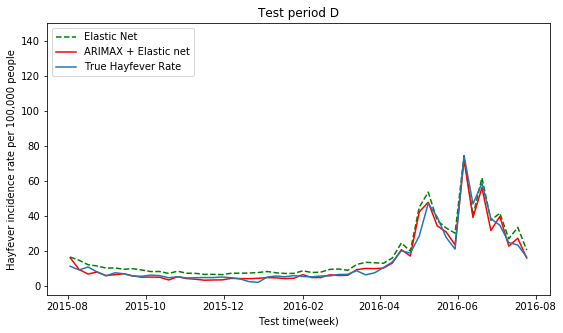

In [22]:
df_4 = pd.DataFrame(data=y_pred_enet4, index=L4,columns=["predicted rate"])
plt.figure(figsize=(9,5))
plt.ylim((-5, 150))
plt.ylabel("Hayfever incidence rate per 100,000 people")
plt.xlabel("Test time(week)")
plt.plot(df_4, label='Elastic Net',color='g',linestyle='--')
plt.plot(df4, label='ARIMAX with Elastic net',color='r')
plt.plot(df4_true, label='True Hayfever Rate')
plt.title('Test period D')
plt.legend(['Elastic Net', 'ARIMAX + Elastic net', 'True Hayfever Rate','ARIMA'], loc='upper left')
pyplot.show()